In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
df_new=pd.read_csv("/work/planet.csv")
df_new.head()

,X,Y,Z,Temp,climate
0,-10.577706,2.279242,-0.865452,-8.438929,-9.494053
1,-7.427127,0.176410,-5.588608,-5.443329,-3.629749
2,-7.590300,7.121962,8.955229,-7.675402,8.909423
3,-8.850700,4.544747,0.616561,-7.159618,-8.560698
4,4.680549,-8.821567,5.156382,8.154624,9.046185


In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
scaler = StandardScaler()
pipeline = make_pipeline(scaler, pca)

X_new=df_new[["X","Y","Z","Temp","climate"]].values


components = pipeline.fit_transform(X_new)

In [5]:
from sklearn.cluster import KMeans
k_means_new = KMeans(init = "k-means++", n_clusters = 6, n_init = 12)
k_means_new.fit(components)

KMeans(n_clusters=6, n_init=12)

In [9]:
labels_new = k_means_new.labels_
k_means_cluster_centers_new = k_means_new.cluster_centers_
k_means_cluster_centers_new

array([[ 1.95859708, -0.89536142],
       [-1.51913679, -0.66770378],
       [ 1.48141776,  2.02255366],
       [ 0.5397698 , -0.01699139],
       [-1.92189456,  1.17665019],
       [ 0.96976016, -0.95611275]])

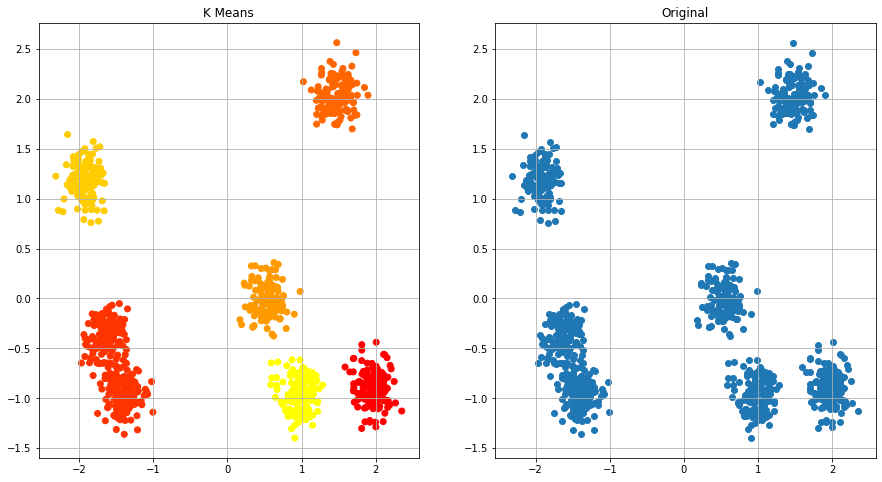

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.set_title('K Means')
ax1.scatter(components[:,0],components[:,1],c=labels_new,cmap='autumn')
ax2.set_title("Original")
ax2.scatter(components[:,0],components[:,1])
ax1.grid()
ax2.grid()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a70149da-7ba5-4906-a687-caea6d00d31b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>